In [25]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Загрузка датасета
df = pd.read_csv('imdb_top_1000.csv')

#### Изучение исходных данных

In [16]:
# Отображаем первые ряды 
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [17]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

#### Очистка данных и приведение их к нужному типу

In [18]:
# Удаление пропусков и некорректных значений, преобразование в числовой формат Released_Year
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Удаление строк с NaN, если они не нужны
df.dropna(subset=['Released_Year'], inplace=True)

# Преобразование Released_Year в тип int
df['Released_Year'] = df['Released_Year'].astype(int)

# Конвертировать Runtime в численный тип
df.dropna(subset=['Runtime'], inplace=True)
df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(int)

# Конвертировать Gross в численный тип
df.dropna(subset=['Gross'], inplace=True)
df['Gross'] = df['Gross'].str.replace(',', '').astype(int)

# Заполняем пустые ячейки Gross и Meta_score медианными значениями
df['Gross'].fillna(df['Gross'].median(), inplace=True)
df['Meta_score'].fillna(df['Meta_score'].median(), inplace=True)

df.head()

/var/folders/c_/115f_wwn2hngwc5hk80vgz300000gn/T/ipykernel_13475/327658406.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gross'].fillna(df['Gross'].median(), inplace=True)
/var/folders/c_/115f_wwn2hngwc5hk80vgz300000gn/T/ipykernel_13475/327658406.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [19]:
df.drop(['Poster_Link', 'Overview'], axis=1)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,PG,157,"Drama, War, Western",7.6,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690
991,Kelly's Heroes,1970,GP,144,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435
992,The Jungle Book,1967,U,78,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612
994,A Hard Day's Night,1964,U,87,"Comedy, Music, Musical",7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024


In [20]:
df.sort_values(by='Gross', ascending=False)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
477,https://m.media-amazon.com/images/M/MV5BOTAzOD...,Star Wars: Episode VII - The Force Awakens,2015,U,138,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225
59,https://m.media-amazon.com/images/M/MV5BMTc5MD...,Avengers: Endgame,2019,UA,181,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000
623,https://m.media-amazon.com/images/M/MV5BMTYwOT...,Avatar,2009,UA,162,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625
60,https://m.media-amazon.com/images/M/MV5BMjMxNj...,Avengers: Infinity War,2018,UA,149,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482
652,https://m.media-amazon.com/images/M/MV5BMDdmZG...,Titanic,1997,UA,194,"Drama, Romance",7.8,A seventeen-year-old aristocrat falls in love ...,75.0,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,https://m.media-amazon.com/images/M/MV5BMTgzMT...,Ajeossi,2010,R,119,"Action, Crime, Drama",7.8,A quiet pawnshop keeper with a violent past ta...,78.0,Jeong-beom Lee,Won Bin,Sae-ron Kim,Tae-hoon Kim,Hee-won Kim,62848,6460
926,https://m.media-amazon.com/images/M/MV5BMTI5Mz...,Dead Man's Shoes,2004,NaN,90,"Crime, Drama, Thriller",7.6,A disaffected soldier returns to his hometown ...,52.0,Shane Meadows,Paddy Considine,Gary Stretch,Toby Kebbell,Stuart Wolfenden,49728,6013
624,https://m.media-amazon.com/images/M/MV5BMTg4OD...,Mr. Nobody,2009,R,141,"Drama, Fantasy, Romance",7.8,A boy stands on a station platform as a train ...,63.0,Jaco Van Dormael,Jared Leto,Sarah Polley,Diane Kruger,Linh Dan Pham,216421,3600
390,https://m.media-amazon.com/images/M/MV5BMTk2Mj...,Knockin' on Heaven's Door,1997,NaN,87,"Action, Crime, Comedy",8.0,Two terminally ill patients escape from a hosp...,78.0,Thomas Jahn,Til Schweiger,Jan Josef Liefers,Thierry van Werveke,Moritz Bleibtreu,27721,3296


#### Графический анализ

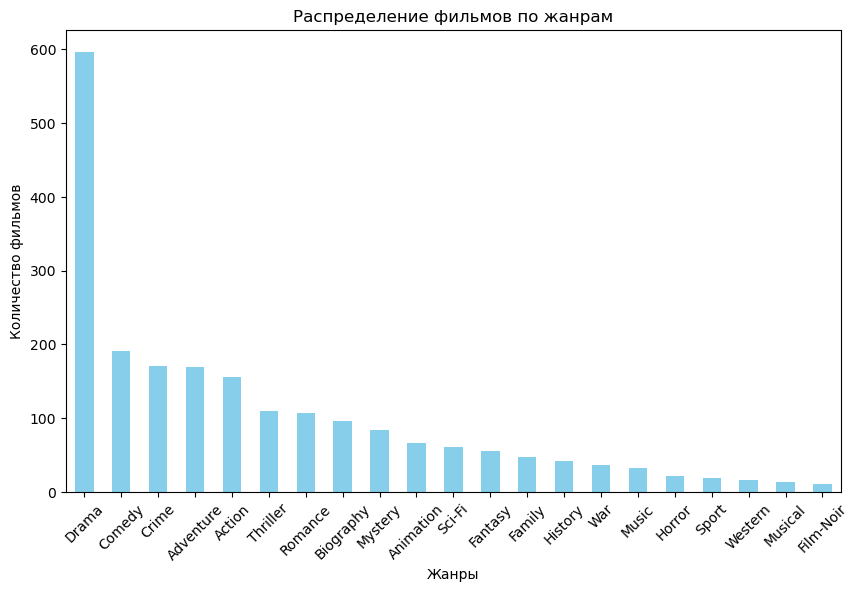

In [21]:
# Разделим строку жанров по запятой и "распакуем" их для подсчета
df['Genre'] = df['Genre'].str.split(', ')

# "Взрываем" список жанров, чтобы каждая строка содержала только один жанр
genre_df = df.explode('Genre')

# Подсчитаем количество фильмов по каждому жанру
genre_counts = genre_df['Genre'].value_counts()

# Построим гистограмму
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение фильмов по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.show()

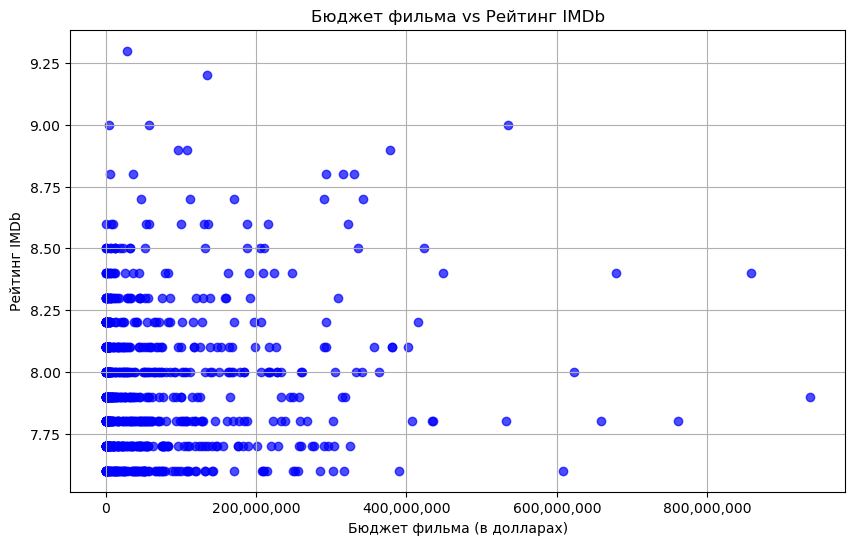

In [22]:
import matplotlib.ticker as ticker

# Построим диаграмму рассеяния (scatter plot) для бюджета и рейтинга
plt.figure(figsize=(10, 6))
plt.scatter(df['Gross'], df['IMDB_Rating'], color='blue', alpha=0.7)

# Подпишем оси и добавим заголовок
plt.title('Бюджет фильма vs Рейтинг IMDb')
plt.xlabel('Бюджет фильма (в долларах)')
plt.ylabel('Рейтинг IMDb')

# Установим формат отображения для оси X (бюджет фильма) в виде обычных чисел
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(True)
plt.show()

### Выявление наиболее успешных режиссеров по среднему рейтингу их фильмов

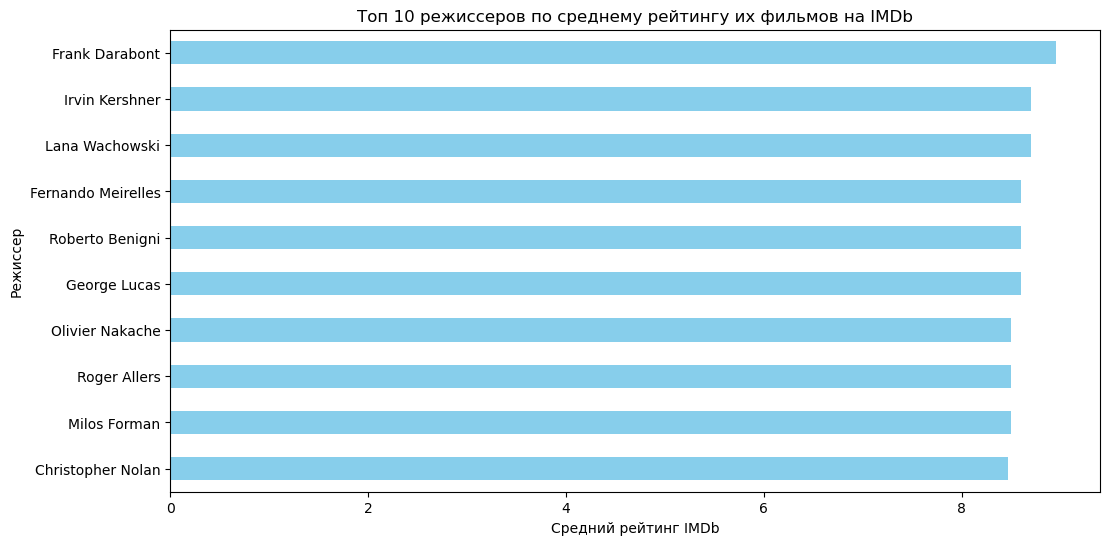

In [23]:
# Группировка данных по режиссерам и вычисление среднего рейтинга
directors_ratings = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False)

# Выбираем топ 10 режиссеров с наивысшим средним рейтингом
top_directors = directors_ratings.head(10)

# Построение графика
plt.figure(figsize=(12, 6))
top_directors.plot(kind='barh', color='skyblue')

# Подписи и заголовок
plt.title('Топ 10 режиссеров по среднему рейтингу их фильмов на IMDb')
plt.xlabel('Средний рейтинг IMDb')
plt.ylabel('Режиссер')

plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы лучший режиссер был наверху
plt.show()

### Корреляция характеристик с рейтингом IMDb

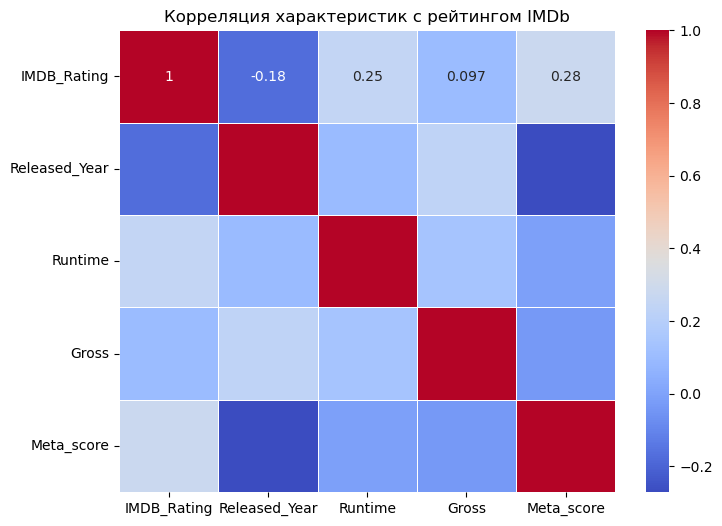

In [24]:
# Построим корреляционную матрицу
correlation_matrix = df[['IMDB_Rating', 'Released_Year', 'Runtime', 'Gross', 'Meta_score']].corr()

# Отобразим корреляционную матрицу
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляция характеристик с рейтингом IMDb')
plt.show()


### Модель для предсказания рейтинга IMDb

In [27]:
# Выбираем целевую переменную и признаки
X = df[['Released_Year', 'Runtime', 'Gross', 'Meta_score']]
y = df['IMDB_Rating']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель
model.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = model.predict(X_test)

In [30]:
# Оцениваем модель
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

Среднеквадратичная ошибка (MSE): 0.07
Коэффициент детерминации (R^2): 0.14


### Визуализация предсказаний модели

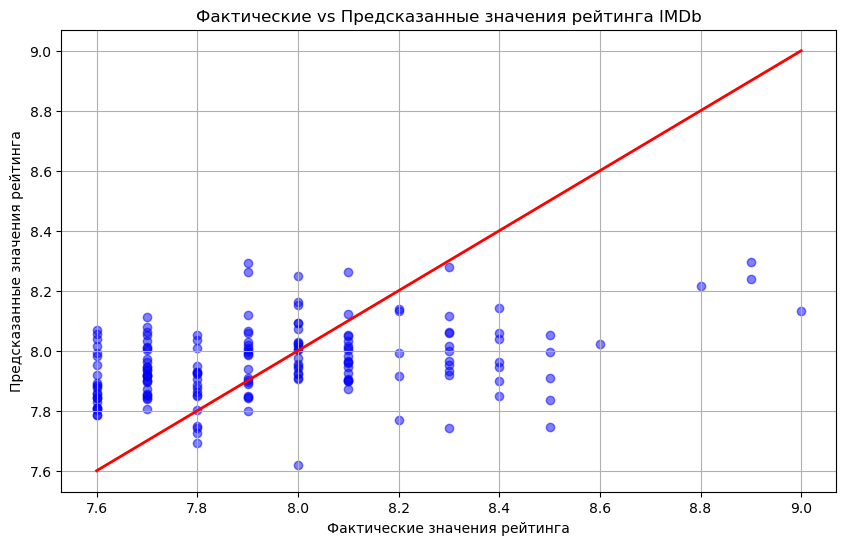

In [31]:
# Построим график фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)

plt.title('Фактические vs Предсказанные значения рейтинга IMDb')
plt.xlabel('Фактические значения рейтинга')
plt.ylabel('Предсказанные значения рейтинга')
plt.grid(True)
plt.show()